#Introduction

This notebook is going to be focused on solving the problem of predicting sales for Rossmann Stores across Germany.

Rossmann, Germany’s second-largest drug store chain, has provided past sales information of 1115 Rossmann stores located across Germany.

We will follow the steps that allow us to ensure the cleanest, most realistic data for our model to make accurate predictions from

1. Load Data and Packages.
2. Analyzing the test variable "Sales"
3. Missing data and Clean Data
4. Feature Engineering
5. Modelling and predictions.

##Import Packages

In [0]:
import pandas as pd
import numpy as np
import matplotlib as mb
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

#Common Model Helpers
from sklearn import model_selection
from sklearn import metrics

#Importing models
from sklearn import ensemble

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_validate
%matplotlib inline

In [0]:
#from google.colab import files
#uploaded = files.upload()

In [0]:
#for fn in uploaded.keys():
   #print("File uploaded is : {}".format(fn));

#Loading the Data

Load the store information using file "store.csv", basically have all the information related to stores.

In [0]:
store_info = pd.read_csv("https://raw.githubusercontent.com/chaitu451/RosslanStoreAnalysis/master/store.csv")
store_info.head(12)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


Load the store details using "train.csv", which basically tell us the sales for each store on particular date.

In [0]:
train_info = pd.read_csv("train.csv")
train_info.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


## Data Exploration

First we will have a look into store data. Info gives the basic information of all the attributes of store data.

In [0]:
store_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Check the null values count for each attributes 

In [0]:
store_info.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Check for promo2 value 0 and fill all the null values of attributes "Promo2SinceWeek", "Promo2SinceYear" with zero.

In [0]:
Promo2WeekZero = store_info[store_info['Promo2'] == 0]['Promo2SinceWeek'].isnull().sum()
Promo2YearZero = store_info[store_info['Promo2'] == 0]['Promo2SinceYear'].isnull().sum()

if Promo2WeekZero == store_info['Promo2SinceWeek'].isnull().sum() and Promo2WeekZero == store_info['Promo2SinceYear'].isnull().sum():
   store_info['Promo2SinceWeek'].fillna(0,inplace=True)
   store_info['Promo2SinceYear'].fillna(0,inplace=True)

Check the null values count is zero.

In [0]:
print(store_info['Promo2SinceWeek'].isnull().sum())
print(store_info['Promo2SinceYear'].isnull().sum())

0
0


Fill "PromoInterval", "CompetitionOpenSinceMonth" and "CompetitionOpenSinceYear" null values with zero.

In [0]:
store_info["PromoInterval"].fillna(0, inplace = True)

In [0]:
store_info["CompetitionOpenSinceMonth"].fillna(0, inplace = True)
store_info["CompetitionOpenSinceYear"].fillna(0, inplace = True)

Fill CompetitionDistance null values with median.

In [0]:
store_info['CompetitionDistance'].fillna(store_info["CompetitionDistance"].median(), inplace = True)

In [0]:
store_info.count()

Store                        1115
StoreType                    1115
Assortment                   1115
CompetitionDistance          1115
CompetitionOpenSinceMonth    1115
CompetitionOpenSinceYear     1115
Promo2                       1115
Promo2SinceWeek              1115
Promo2SinceYear              1115
PromoInterval                1115
dtype: int64

## Which year promo2 had applied the most? 

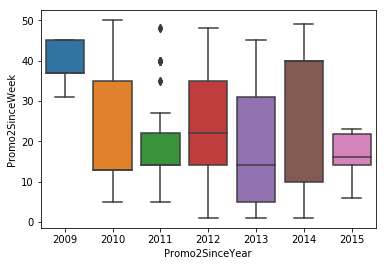

In [0]:
promodf = pd.DataFrame(store_info[store_info['Promo2'] == 1])
weekdetails = promodf['Promo2SinceWeek'].astype(int)
yeardetails = promodf['Promo2SinceYear'].astype(int)
sb.boxplot(x=yeardetails,y=weekdetails, data=promodf)
plt.show()




*   We can see the year 2014, the utilization of promo is high compared to other years.
*   In 2009, the promo is not applied from the beginning of the year.
*   There are very less stores utilized promo in the year 2011, There is a possibility that the sales are high in that year for most of the stores.



## Frequency of stores utilized promo every year

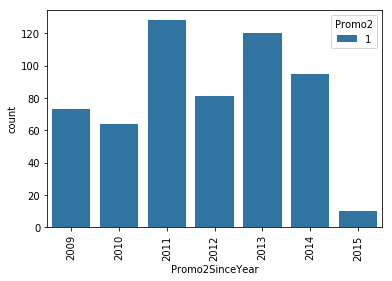

In [0]:
promodf = pd.DataFrame(store_info[store_info['Promo2'] == 1])
yeardetails = promodf['Promo2SinceYear'].astype(int)
sb.countplot(x=yeardetails, hue='Promo2',data=promodf)
plt.xticks(rotation=90)
plt.show()

*   Most of the stores utilized promo in the year 2011.
*   Very less stores utilized promo in the year 2015.

##Distribution of StoreType and Assortment

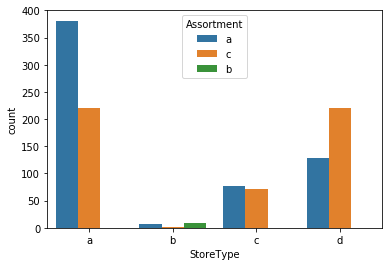

In [0]:
sb.countplot(x='StoreType',data=store_info,hue='Assortment',order=['a','b','c','d'])
plt.show()

We can say that,


*   All the storetype's having assortment "a" and "C".
*   But only StoreType 'b' have three assortments 'a','b' and 'c'.



## StoreType and the promo applied

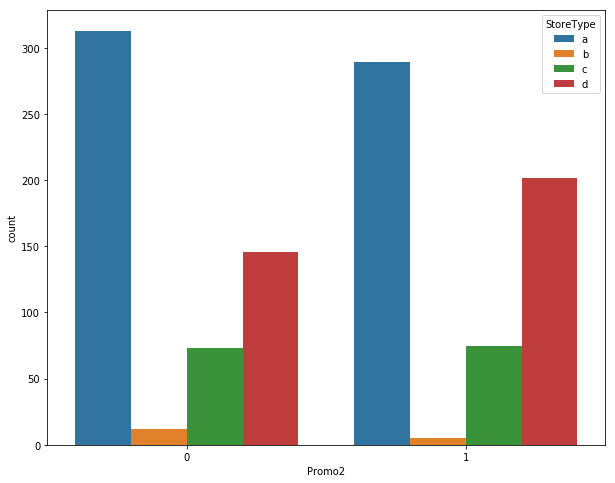

In [0]:
plt.figure(figsize=(10,8))
sb.countplot(x='Promo2',data=store_info,hue='StoreType',hue_order=['a','b','c','d'])
plt.show()

We can say that,

*   StoreType 'a' stores don't utilized Promo's the most.
*   StoreType 'd' stores is having high participation of promo's.

## Competition Opened Month and Year using Facet Grid

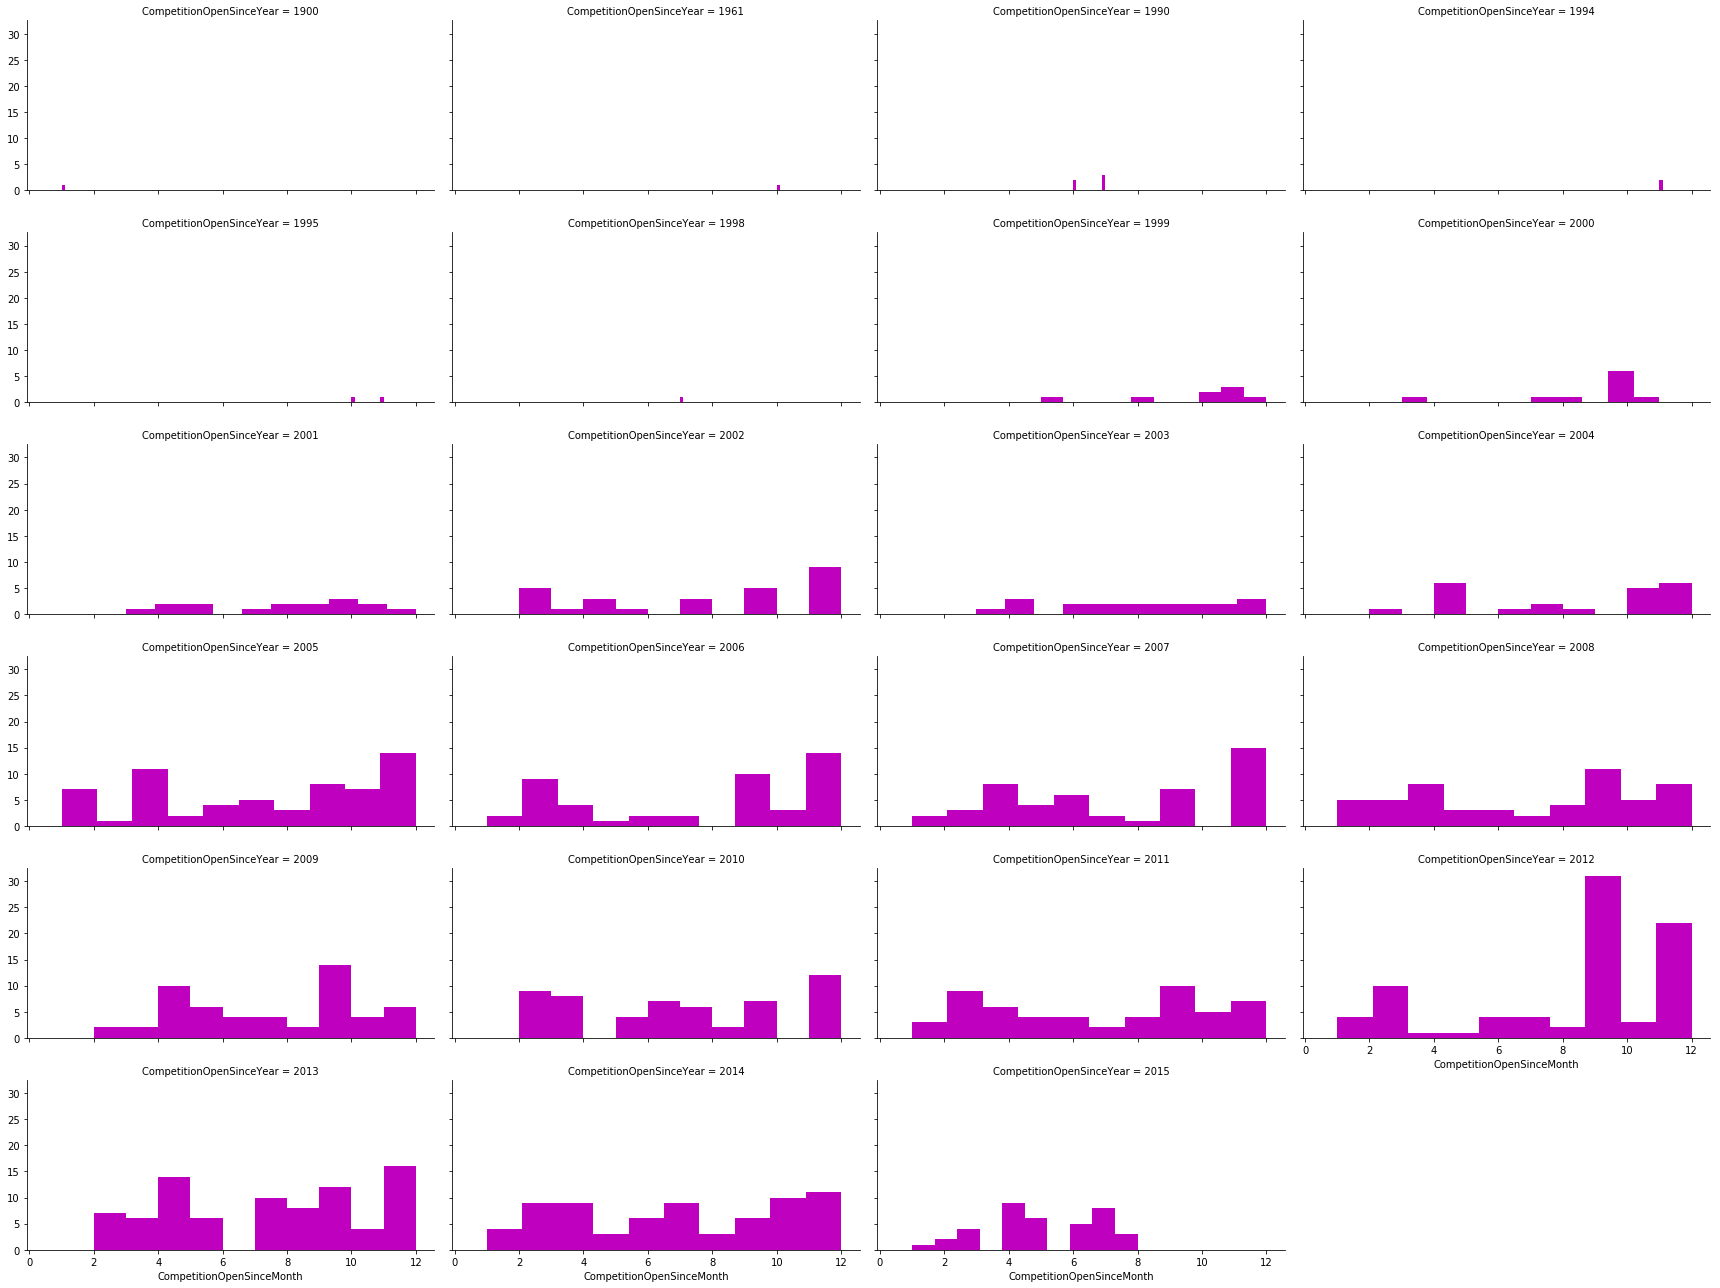

In [0]:
competedf = store_info.copy()
competedf['CompetitionOpenSinceMonth'] = competedf['CompetitionOpenSinceMonth'].astype(int)
competedf['CompetitionOpenSinceYear'] = competedf['CompetitionOpenSinceYear'].astype(int)
g = sb.FacetGrid(data=competedf[competedf['CompetitionOpenSinceYear'] != 0],col='CompetitionOpenSinceYear',aspect=2,col_wrap=4)
g = g.map(plt.hist,'CompetitionOpenSinceMonth',color='m')


In [0]:
#from google.colab import files
#uploaded = files.upload()

In [0]:
#for fn in uploaded.keys():
#   print("File uploaded is : {}".format(fn));

Started understanding the train datset.

In [0]:
train_info.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


* Looks like Most of the data having zero for attribute 'SchoolHoliday'.
* Customers and Sales columns are having min value zero, it is because when the store is closed then there will be no sales.
* 50% of the data having promo zero.

In [0]:
train_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


This dataset is having huge number of records.

In [0]:
train_info.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

There are no null values. No need to do data preprocessing.

Try to find the average sales, customers and salespercustomer.

In [0]:
train_info['SalesPerCustomer'] = train_info['Sales']/train_info['Customers']
avg_info = train_info.groupby('Store')['Sales','Customers','SalesPerCustomer'].mean()

In [0]:
avg_info.rename(columns=lambda x: 'Avg' + x,inplace=True)
store_info = store_info.merge(avg_info,how='left',on='Store')
store_info

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,AvgSales,AvgCustomers,AvgSalesPerCustomer
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3945.704883,467.646497,8.393038
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",4122.991507,486.045648,8.408443
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",5741.253715,620.286624,9.117599
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,8021.769639,1100.057325,7.249827
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,3867.110403,444.360934,8.611229
5,6,a,a,310.0,12.0,2013.0,0,0.0,0.0,0,4562.375796,525.990446,8.634089
6,7,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0,7356.902335,791.474522,9.232635
7,8,a,a,7520.0,10.0,2014.0,0,0.0,0.0,0,4610.251592,547.799363,8.290323
8,9,a,c,2030.0,8.0,2000.0,0,0.0,0.0,0,5426.816348,479.487261,11.206413
9,10,a,a,3160.0,9.0,2009.0,0,0.0,0.0,0,4634.439490,494.332272,9.331909


In [0]:
closeddf = train_info[train_info['Open']==0]

##Which week most of the stores are closed?

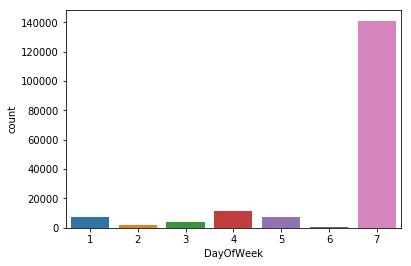

In [0]:
sb.countplot(x='DayOfWeek',data=closeddf)
plt.show()

* Most of the stores are closed on 7th Day of the week.
* 4th day of the week around 15000 stores were closed. We can assume that it might be some public holiday, festival day or personal emergency.

## How the sales on each day of the week?

In [0]:
train_info = train_info.loc[train_info['Sales'] > 0]

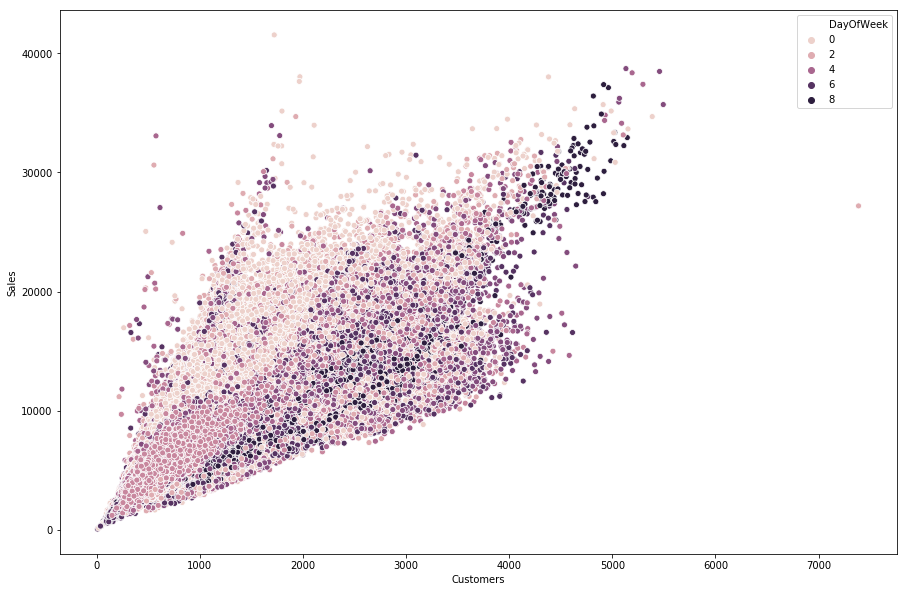

In [0]:
plt.figure(figsize=(15,10))
sb.scatterplot(x='Customers',y='Sales',data=train_info,hue='DayOfWeek')
plt.show()

From above we see that there are various gradients for sales on different days

# #How the sales effected with school holiday?

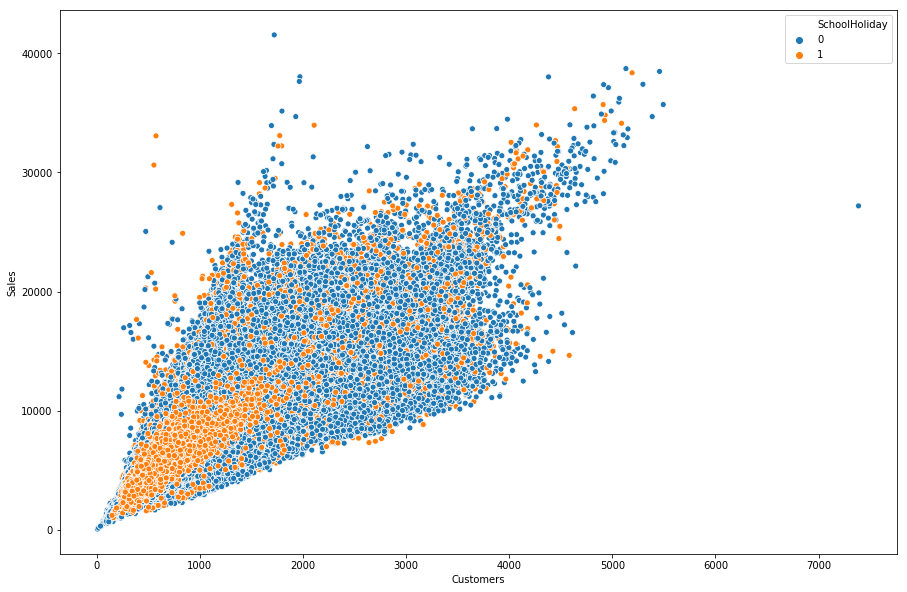

In [0]:
plt.figure(figsize=(15,10))
sb.scatterplot(x='Customers',y='Sales',data=train_info,hue='SchoolHoliday')
plt.show()

It appears that school holiday doesn't seem to have much of an impact.

# # How stores provide promo on each day of the week?

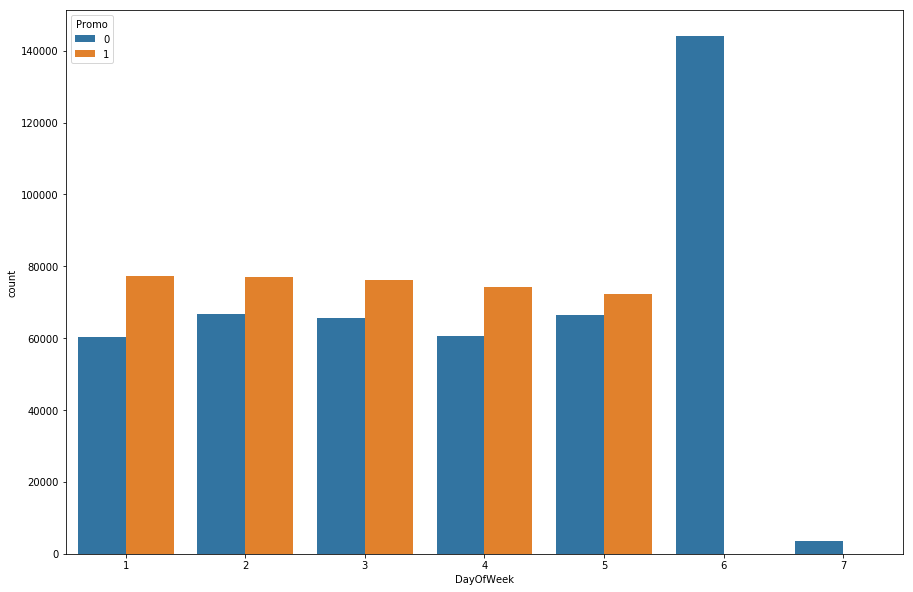

In [0]:
plt.figure(figsize=(15,10))
sb.countplot(x='DayOfWeek',hue='Promo',data=train_info)
plt.show()

* Promo is not active on 6th and 7th day of the week.
* Most of the stores are remain closed on 7th day of the week.

In [0]:
train_info['Date'] = pd.to_datetime(train_info['Date'])

Merge both the store and train datasets 

In [0]:
mergeddf = train_info.merge(store_info,how='left',on='Store')

In [0]:
mergeddf.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,AvgSales,AvgCustomers,AvgSalesPerCustomer
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3945.704883,467.646497,8.393038
1,2,5,2015-07-31,6064,625,1,1,0,1,9.702400,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",4122.991507,486.045648,8.408443
2,3,5,2015-07-31,8314,821,1,1,0,1,10.126675,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",5741.253715,620.286624,9.117599
3,4,5,2015-07-31,13995,1498,1,1,0,1,9.342457,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,8021.769639,1100.057325,7.249827
4,5,5,2015-07-31,4822,559,1,1,0,1,8.626118,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,3867.110403,444.360934,8.611229
5,6,5,2015-07-31,5651,589,1,1,0,1,9.594228,a,a,310.0,12.0,2013.0,0,0.0,0.0,0,4562.375796,525.990446,8.634089
6,7,5,2015-07-31,15344,1414,1,1,0,1,10.851485,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0,7356.902335,791.474522,9.232635
7,8,5,2015-07-31,8492,833,1,1,0,1,10.194478,a,a,7520.0,10.0,2014.0,0,0.0,0.0,0,4610.251592,547.799363,8.290323
8,9,5,2015-07-31,8565,687,1,1,0,1,12.467249,a,c,2030.0,8.0,2000.0,0,0.0,0.0,0,5426.816348,479.487261,11.206413
9,10,5,2015-07-31,7185,681,1,1,0,1,10.550661,a,a,3160.0,9.0,2009.0,0,0.0,0.0,0,4634.439490,494.332272,9.331909


In [0]:
mergeddf.shape

(844338, 22)

In [0]:
storeList = mergeddf['StoreType'].unique().tolist()

for i in storeList:
   key = 'StoreType_' + i
   mergeddf[key] = mergeddf['StoreType'].apply(lambda x : 1 if x == i else 0)

In [0]:
AssortmentList = mergeddf['Assortment'].unique().tolist()

for i in AssortmentList:
   key = 'Assortment_' + i
   mergeddf[key] = mergeddf['Assortment'].apply(lambda x : 1 if x == i else 0)

In [0]:
mergeddf['StateHoliday'] = mergeddf['StateHoliday'].map({0:0,'0' : 0, 'a' : 1, 'b' : 1, 'c' : 1}).astype(int)

In [0]:
mergeddf.drop(columns=['StoreType','Assortment'],inplace=True)

In [0]:
mergeddf['SalesPerCustomer'].fillna(0,inplace=True)

Extract Year, Month, Day and Month values from Date column and calculate the months competition was opened and convert few columns to int from float.

In [0]:
mergeddf['year'] = mergeddf.Date.dt.year
mergeddf['month'] = mergeddf.Date.dt.month
mergeddf['day'] = mergeddf.Date.dt.day
mergeddf['week'] = mergeddf.Date.dt.week

In [0]:
mergeddf['MonthsCompetitionOpen'] = 12 * (mergeddf['year'] - mergeddf['CompetitionOpenSinceYear']) + (mergeddf['month'] - mergeddf['CompetitionOpenSinceMonth'])
mergeddf.loc[mergeddf['CompetitionOpenSinceYear'] == 0,'MonthsCompetitionOpen'] = 0

In [0]:
mergeddf['PromoOpenWeeks'] = 52 * (mergeddf['year'] - mergeddf['Promo2SinceYear']) + (mergeddf['week'] - mergeddf['Promo2SinceWeek'])
mergeddf.loc[mergeddf['Promo2SinceYear'] == 0,'PromoOpenWeeks'] = 0

In [0]:
mergeddf['SalesPerCustomer'].fillna(0,inplace=True)

In [0]:
IntConvertList = ['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','MonthsCompetitionOpen','PromoOpenWeeks']
mergeddf[IntConvertList] = mergeddf[IntConvertList].astype(int)

In [0]:
mergeddf

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,AvgSales,AvgCustomers,AvgSalesPerCustomer,StoreType_c,StoreType_a,StoreType_d,StoreType_b,Assortment_a,Assortment_c,Assortment_b,year,month,day,week,MonthsCompetitionOpen,PromoOpenWeeks
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883,1270.0,9,2008,0,0,0,0,3945.704883,467.646497,8.393038,1,0,0,0,1,0,0,2015,7,31,31,82,0
1,2,5,2015-07-31,6064,625,1,1,0,1,9.702400,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",4122.991507,486.045648,8.408443,0,1,0,0,1,0,0,2015,7,31,31,92,278
2,3,5,2015-07-31,8314,821,1,1,0,1,10.126675,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",5741.253715,620.286624,9.117599,0,1,0,0,1,0,0,2015,7,31,31,103,225
3,4,5,2015-07-31,13995,1498,1,1,0,1,9.342457,620.0,9,2009,0,0,0,0,8021.769639,1100.057325,7.249827,1,0,0,0,0,1,0,2015,7,31,31,70,0
4,5,5,2015-07-31,4822,559,1,1,0,1,8.626118,29910.0,4,2015,0,0,0,0,3867.110403,444.360934,8.611229,0,1,0,0,1,0,0,2015,7,31,31,3,0
5,6,5,2015-07-31,5651,589,1,1,0,1,9.594228,310.0,12,2013,0,0,0,0,4562.375796,525.990446,8.634089,0,1,0,0,1,0,0,2015,7,31,31,19,0
6,7,5,2015-07-31,15344,1414,1,1,0,1,10.851485,24000.0,4,2013,0,0,0,0,7356.902335,791.474522,9.232635,0,1,0,0,0,1,0,2015,7,31,31,27,0
7,8,5,2015-07-31,8492,833,1,1,0,1,10.194478,7520.0,10,2014,0,0,0,0,4610.251592,547.799363,8.290323,0,1,0,0,1,0,0,2015,7,31,31,9,0
8,9,5,2015-07-31,8565,687,1,1,0,1,12.467249,2030.0,8,2000,0,0,0,0,5426.816348,479.487261,11.206413,0,1,0,0,0,1,0,2015,7,31,31,179,0
9,10,5,2015-07-31,7185,681,1,1,0,1,10.550661,3160.0,9,2009,0,0,0,0,4634.439490,494.332272,9.331909,0,1,0,0,1,0,0,2015,7,31,31,70,0


Create dummies for PromoInterval column

In [0]:
dummy = pd.get_dummies(mergeddf['PromoInterval'])

for i in dummy.columns:
   if type(i) == int:
      interStr = 'PromoInterval_' + str(i)
   else:
      interStr = 'PromoInterval_' + i
   mergeddf[interStr] = dummy[i]

mergeddf

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,AvgSales,AvgCustomers,AvgSalesPerCustomer,StoreType_c,StoreType_a,StoreType_d,StoreType_b,Assortment_a,Assortment_c,Assortment_b,year,month,day,week,MonthsCompetitionOpen,PromoOpenWeeks,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883,1270.0,9,2008,0,0,0,0,3945.704883,467.646497,8.393038,1,0,0,0,1,0,0,2015,7,31,31,82,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,9.702400,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",4122.991507,486.045648,8.408443,0,1,0,0,1,0,0,2015,7,31,31,92,278,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,10.126675,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",5741.253715,620.286624,9.117599,0,1,0,0,1,0,0,2015,7,31,31,103,225,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,9.342457,620.0,9,2009,0,0,0,0,8021.769639,1100.057325,7.249827,1,0,0,0,0,1,0,2015,7,31,31,70,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,8.626118,29910.0,4,2015,0,0,0,0,3867.110403,444.360934,8.611229,0,1,0,0,1,0,0,2015,7,31,31,3,0,1,0,0,0
5,6,5,2015-07-31,5651,589,1,1,0,1,9.594228,310.0,12,2013,0,0,0,0,4562.375796,525.990446,8.634089,0,1,0,0,1,0,0,2015,7,31,31,19,0,1,0,0,0
6,7,5,2015-07-31,15344,1414,1,1,0,1,10.851485,24000.0,4,2013,0,0,0,0,7356.902335,791.474522,9.232635,0,1,0,0,0,1,0,2015,7,31,31,27,0,1,0,0,0
7,8,5,2015-07-31,8492,833,1,1,0,1,10.194478,7520.0,10,2014,0,0,0,0,4610.251592,547.799363,8.290323,0,1,0,0,1,0,0,2015,7,31,31,9,0,1,0,0,0
8,9,5,2015-07-31,8565,687,1,1,0,1,12.467249,2030.0,8,2000,0,0,0,0,5426.816348,479.487261,11.206413,0,1,0,0,0,1,0,2015,7,31,31,179,0,1,0,0,0
9,10,5,2015-07-31,7185,681,1,1,0,1,10.550661,3160.0,9,2009,0,0,0,0,4634.439490,494.332272,9.331909,0,1,0,0,1,0,0,2015,7,31,31,70,0,1,0,0,0


Normalizing the Competition Distance to make sure reduce the biasness in the data.

Text(0, 0.5, 'Frequency')

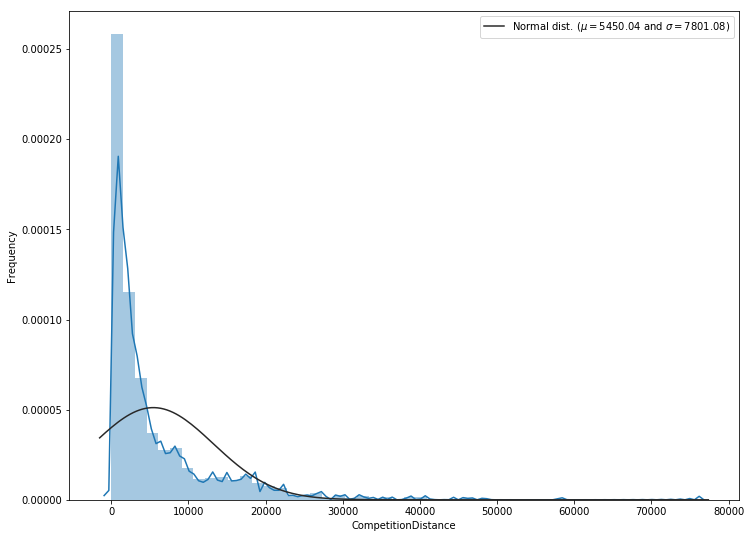

In [0]:
plt.subplots(figsize=(12,9))
sb.distplot(mergeddf['CompetitionDistance'],fit=stats.norm)
(mu,sigma) = stats.norm.fit(mergeddf['CompetitionDistance'])
plt.legend(['Normal dist. ($\mu=${:.2f} and $\sigma = ${:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')

Here it is right skewed, Most of the data is in between 0 to 10,000. There are outliers. 
Maximum value is around 76000. We can see there is bias in the data.

One way to do normalization is using log transformation. Numpy is having a function called log1p which do this job for us.

In [0]:
mergeddf['CompetitionDistance'] = np.log1p(mergeddf['CompetitionDistance'])

Text(0, 0.5, 'Frequency')

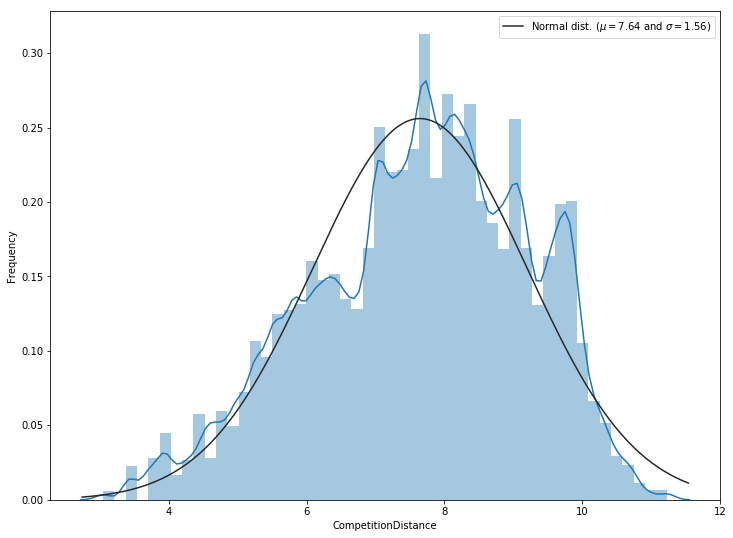

In [0]:
plt.subplots(figsize=(12,9))
sb.distplot(mergeddf['CompetitionDistance'],fit=stats.norm)
(mu,sigma) = stats.norm.fit(mergeddf['CompetitionDistance'])
plt.legend(['Normal dist. ($\mu=${:.2f} and $\sigma = ${:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')

Even though it is not normally distributed completely. We make sure to reduce the biasness with competition distance column.

In [0]:
mergeddf

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,AvgSales,AvgCustomers,AvgSalesPerCustomer,StoreType_c,StoreType_a,StoreType_d,StoreType_b,Assortment_a,Assortment_c,Assortment_b,year,month,day,week,MonthsCompetitionOpen,PromoOpenWeeks,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883,7.147559,9,2008,0,0,0,0,3945.704883,467.646497,8.393038,1,0,0,0,1,0,0,2015,7,31,31,82,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,9.702400,6.347389,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",4122.991507,486.045648,8.408443,0,1,0,0,1,0,0,2015,7,31,31,92,278,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,10.126675,9.556126,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",5741.253715,620.286624,9.117599,0,1,0,0,1,0,0,2015,7,31,31,103,225,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,9.342457,6.431331,9,2009,0,0,0,0,8021.769639,1100.057325,7.249827,1,0,0,0,0,1,0,2015,7,31,31,70,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,8.626118,10.305982,4,2015,0,0,0,0,3867.110403,444.360934,8.611229,0,1,0,0,1,0,0,2015,7,31,31,3,0,1,0,0,0
5,6,5,2015-07-31,5651,589,1,1,0,1,9.594228,5.739793,12,2013,0,0,0,0,4562.375796,525.990446,8.634089,0,1,0,0,1,0,0,2015,7,31,31,19,0,1,0,0,0
6,7,5,2015-07-31,15344,1414,1,1,0,1,10.851485,10.085851,4,2013,0,0,0,0,7356.902335,791.474522,9.232635,0,1,0,0,0,1,0,2015,7,31,31,27,0,1,0,0,0
7,8,5,2015-07-31,8492,833,1,1,0,1,10.194478,8.925454,10,2014,0,0,0,0,4610.251592,547.799363,8.290323,0,1,0,0,1,0,0,2015,7,31,31,9,0,1,0,0,0
8,9,5,2015-07-31,8565,687,1,1,0,1,12.467249,7.616284,8,2000,0,0,0,0,5426.816348,479.487261,11.206413,0,1,0,0,0,1,0,2015,7,31,31,179,0,1,0,0,0
9,10,5,2015-07-31,7185,681,1,1,0,1,10.550661,8.058644,9,2009,0,0,0,0,4634.439490,494.332272,9.331909,0,1,0,0,1,0,0,2015,7,31,31,70,0,1,0,0,0


In [0]:
mergedWithOutCat = mergeddf.drop(columns=['Date','PromoInterval','Sales'],axis=1)
Target = ['Sales']
mergedWithOutCat.head(10)

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,AvgSales,AvgCustomers,AvgSalesPerCustomer,StoreType_c,StoreType_a,StoreType_d,StoreType_b,Assortment_a,Assortment_c,Assortment_b,year,month,day,week,MonthsCompetitionOpen,PromoOpenWeeks,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,555,1,1,0,1,9.482883,7.147559,9,2008,0,0,0,3945.704883,467.646497,8.393038,1,0,0,0,1,0,0,2015,7,31,31,82,0,1,0,0,0
1,2,5,625,1,1,0,1,9.702400,6.347389,11,2007,1,13,2010,4122.991507,486.045648,8.408443,0,1,0,0,1,0,0,2015,7,31,31,92,278,0,0,1,0
2,3,5,821,1,1,0,1,10.126675,9.556126,12,2006,1,14,2011,5741.253715,620.286624,9.117599,0,1,0,0,1,0,0,2015,7,31,31,103,225,0,0,1,0
3,4,5,1498,1,1,0,1,9.342457,6.431331,9,2009,0,0,0,8021.769639,1100.057325,7.249827,1,0,0,0,0,1,0,2015,7,31,31,70,0,1,0,0,0
4,5,5,559,1,1,0,1,8.626118,10.305982,4,2015,0,0,0,3867.110403,444.360934,8.611229,0,1,0,0,1,0,0,2015,7,31,31,3,0,1,0,0,0
5,6,5,589,1,1,0,1,9.594228,5.739793,12,2013,0,0,0,4562.375796,525.990446,8.634089,0,1,0,0,1,0,0,2015,7,31,31,19,0,1,0,0,0
6,7,5,1414,1,1,0,1,10.851485,10.085851,4,2013,0,0,0,7356.902335,791.474522,9.232635,0,1,0,0,0,1,0,2015,7,31,31,27,0,1,0,0,0
7,8,5,833,1,1,0,1,10.194478,8.925454,10,2014,0,0,0,4610.251592,547.799363,8.290323,0,1,0,0,1,0,0,2015,7,31,31,9,0,1,0,0,0
8,9,5,687,1,1,0,1,12.467249,7.616284,8,2000,0,0,0,5426.816348,479.487261,11.206413,0,1,0,0,0,1,0,2015,7,31,31,179,0,1,0,0,0
9,10,5,681,1,1,0,1,10.550661,8.058644,9,2009,0,0,0,4634.439490,494.332272,9.331909,0,1,0,0,1,0,0,2015,7,31,31,70,0,1,0,0,0


In [0]:
mergedWithOutCat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 844337
Data columns (total 34 columns):
Store                             844338 non-null int64
DayOfWeek                         844338 non-null int64
Customers                         844338 non-null int64
Open                              844338 non-null int64
Promo                             844338 non-null int64
StateHoliday                      844338 non-null int64
SchoolHoliday                     844338 non-null int64
SalesPerCustomer                  844338 non-null float64
CompetitionDistance               844338 non-null float64
CompetitionOpenSinceMonth         844338 non-null int64
CompetitionOpenSinceYear          844338 non-null int64
Promo2                            844338 non-null int64
Promo2SinceWeek                   844338 non-null int64
Promo2SinceYear                   844338 non-null int64
AvgSales                          844338 non-null float64
AvgCustomers                      844338 no

# Model Evalution

In [0]:
import warnings
warnings.filterwarnings('ignore')

Identify the target variable and do train and test split on the data by taking the test_size as 0.15.

In [0]:
from sklearn.model_selection import train_test_split
X = [
    'Store', 
    'Customers',
    'CompetitionDistance', 

    'Promo', 
    'Promo2', 

    'StateHoliday',
    'StoreType_a',
    'StoreType_b',
    'StoreType_c',
    'StoreType_d',
    'Assortment_a',
    'Assortment_b',
    'Assortment_c',
    'AvgSales',
    'AvgCustomers',
    'AvgSalesPerCustomer', 
    'SalesPerCustomer',
    'DayOfWeek',
    'week',
    'day',
    'month',
    'year',
    'CompetitionOpenSinceMonth',
    'CompetitionOpenSinceYear',
    'Promo2SinceWeek',
    'Promo2SinceYear'

]

X_train,X_test,y_train,y_test = train_test_split(mergeddf[X],mergeddf['Sales'],test_size=0.15,random_state=10)

Apply cross_val_score and find out the mean, variance and RMSPE for the model. By taking feature_importance_ figure it out the importance of each and every independent vairables for target variable “Sales”.

The first intuition, since there are some distinct separation of scaling due to features such as store type and whether there is a holiday, a decision tree seems to be a good idea

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Error calculating function according to kaggle
def rmspe(y, y_hat):
    return np.sqrt(np.mean(((y - y_hat) / y) ** 2))

rmpse_scorer = make_scorer(rmspe, greater_is_better = False) # Loss function

def score(model, X_train, y_train, y_test, y_hat):
    score = cross_val_score(model, X_train, y_train, scoring=rmpse_scorer, cv=5)
    print('Mean', score.mean())
    print('Variance', score.var())
    print('RMSPE', rmspe(y_test, y_hat))

def plot_importance(model):
    k = list(zip(X, model.feature_importances_))
    k.sort(key=lambda tup: tup[1])

    labels, vals = zip(*k)
    plt.figure(figsize=(12,10))
    plt.barh(np.arange(len(X)), vals, align='center')
    plt.yticks(np.arange(len(X)), labels)

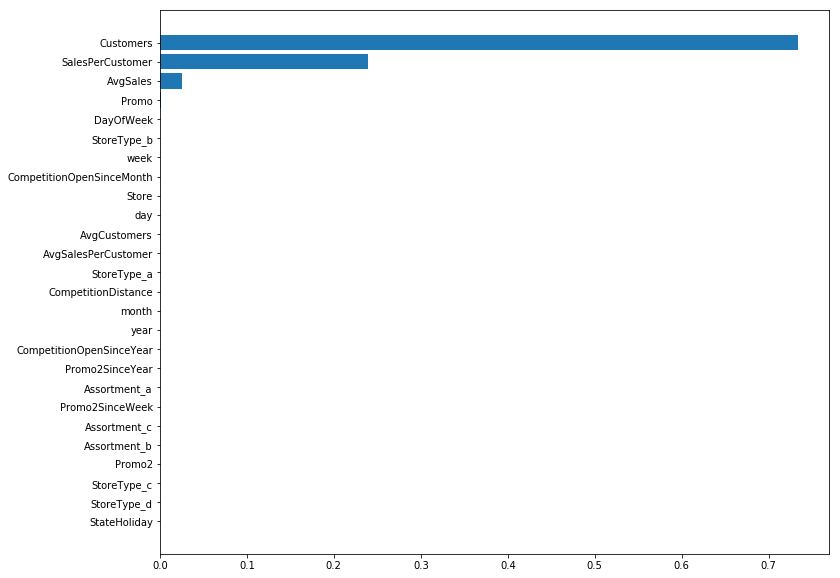

In [0]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
plot_importance(decision_tree)

In [0]:
y_hat = decision_tree.predict(X_test)
score(decision_tree, X_train, y_train, y_test, y_hat)

Mean -0.007269421067549011
Variance 4.867361154418299e-06
RMSPE 0.005220978744064413


Let's try some ensemble of decision tree, for example, adaboosting tree.

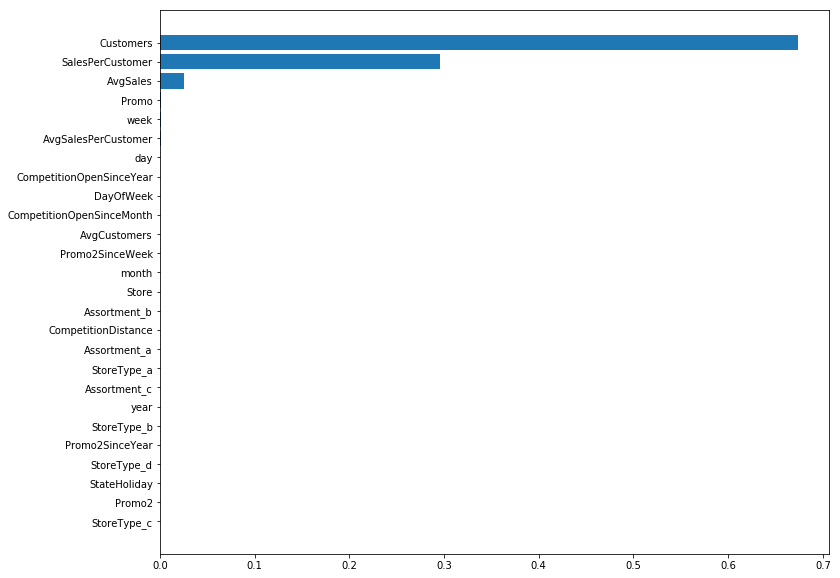

In [0]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_tree = AdaBoostRegressor(DecisionTreeRegressor())
adaboost_tree.fit(X_train, y_train)
plot_importance(adaboost_tree)

In [0]:
y_hat = adaboost_tree.predict(X_test)
score(adaboost_tree, X_train, y_train, y_test, y_hat)

Mean -0.005279232767325219
Variance 8.553353283393494e-06
RMSPE 0.003603579054617204


That is pretty good, how about using Random Forest?

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.5min finished


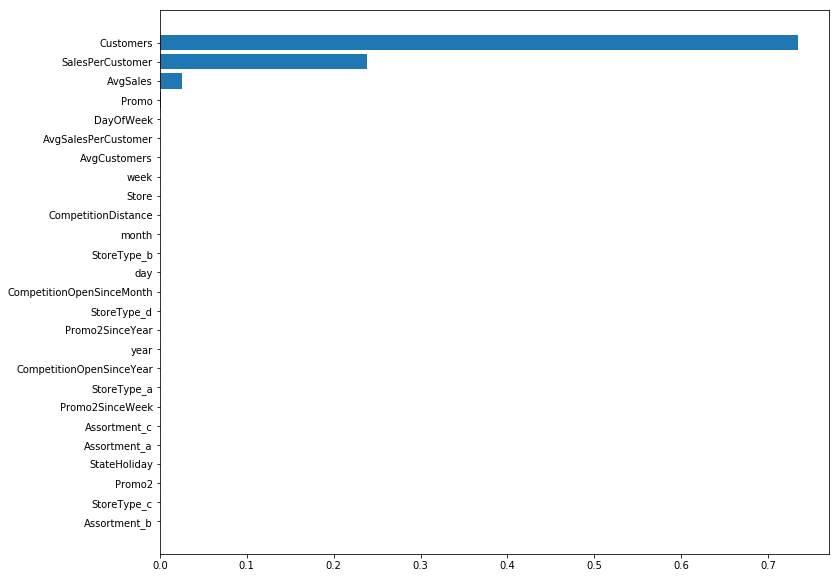

In [0]:
from sklearn.ensemble import RandomForestRegressor
randomforest = RandomForestRegressor(n_estimators=25,n_jobs=-1,verbose=1)
randomforest.fit(X_train,y_train)
plot_importance(randomforest)

In [0]:
y_hat = randomforest.predict(X_test)
score(randomforest, X_train, y_train, y_test, y_hat)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  2

Mean -0.006084532312334319
Variance 1.0612225319380129e-05
RMSPE 0.003498727215206367


[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    0.8s finished


What if we used gradient boosted tree with xgboost?

In [0]:
import xgboost as xgb

def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

xgboost_tree = xgb.XGBRegressor(
    n_jobs = -1,
    n_estimators = 1000,
    eta = 0.1,
    max_depth = 2,
    min_child_weight = 2,
    subsample = 0.8,
    colsample_bytree = 0.8,
    tree_method = 'exact',
    reg_alpha = 0.05,
    silent = 0,
    random_state = 1023
)
xgboost_tree.fit(X_train[X], np.log1p(y_train), 
                 eval_set = [(X_train[X], np.log1p(y_train)), (X_test[X], np.log1p(y_test))],
                 eval_metric = rmspe_xg,
                 early_stopping_rounds = 300
                )

[15:37:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:7.44317	validation_1-rmse:7.44338	validation_0-rmspe:0.999527	validation_1-rmspe:0.999528
Multiple eval metrics have been passed: 'validation_1-rmspe' will be used for early stopping.

Will train until validation_1-rmspe hasn't improved in 300 rounds.
[1]	validation_0-rmse:6.69974	validation_1-rmse:6.69998	validation_0-rmspe:0.99883	validation_1-rmspe:0.998831
[2]	validation_0-rmse:6.03076	validation_1-rmse:6.03098	validation_0-rmspe:0.997573	validation_1-rmspe:0.997576
[3]	validation_0-rmse:5.42884	validation_1-rmse:5.42905	validation_0-rmspe:0.995456	validation_1-rmspe:0.995462
[4]	validation_0-rmse:4.88721	validation_1-rmse:4.88741	validation_0-rmspe:0.992107	validation_1-rmspe:0.992117
[5]	validation_0-rmse:4.39957	validation_1-rmse:4.39977	validation_0-rmspe:0.98712	validation_1-rmspe:0.987135
[6]	validation_0-rmse:3.96081	validation_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=2, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=1023,
             reg_alpha=0.05, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=0, subsample=0.8, tree_method='exact', verbosity=1)

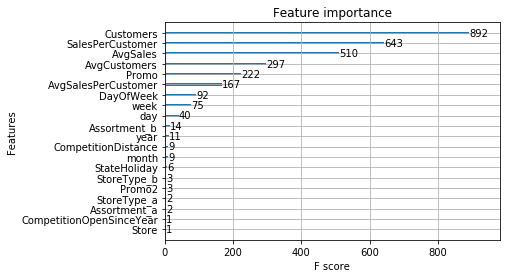

In [0]:
xgb.plot_importance(xgboost_tree)

In [0]:
def rmspe_exp(y, y_hat):
    return rmspe(np.expm1(y), np.expm1(y_hat))

rmpse_xg_scorer = make_scorer(rmspe_exp, greater_is_better = False) # Loss function

def score(model, X_train, y_train, y_test, y_hat):
    score = cross_val_score(model, X_train, y_train, scoring=rmpse_xg_scorer, cv=5)
    print('Mean', score.mean())
    print('Variance', score.var())
    print('RMSPE', rmspe(y_test, np.expm1(y_hat)))

y_hat = xgboost_tree.predict(X_test[X])
score(xgboost_tree, X_train[X], np.log1p(y_train), y_test, y_hat)

[15:46:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:48:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:51:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:54:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean -0.012773218809896292
Variance 6.76561557454307e-08
RMSPE 0.012849936697687784


In the plot importance for all the models, Customers, SalesPerCustomer and AvgSales are top three priority columns to predict the Sales.
Xg_boost also says "Promo" is also importance column.